## Problem 1

In [144]:
import numpy as np
import scipy as sp
from scipy import sparse
from scipy import linalg

def condition_number(A):
    singulars = linalg.svd(A)[1]
    max_singular = max(singulars)
    min_singular = min(singulars)
    k = max_singular/min_singular
    return k

In [145]:
A = np.array([[3,5,6],[7,1,0],[3,4,1]])
print(condition_number(A))
print( np.linalg.cond(A))

5.28168975897
5.28168975897


## Problem 2

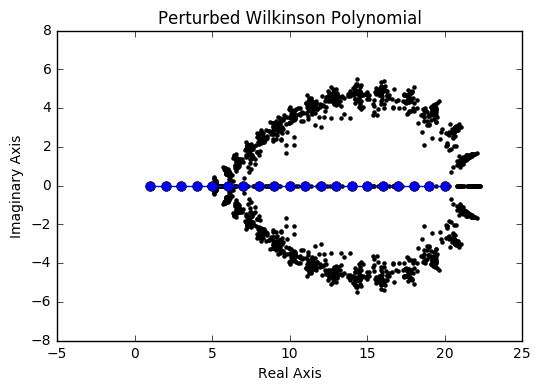

Average Absolute Condition Number: 1.45730062247634e-8
Average Relative Condition Number: 10058113840.7472


In [146]:
import sympy as sy
from matplotlib import pyplot as plt
from scipy import linalg as la

# The roots of w are 1, 2, ..., 20.
w_roots = np.arange(1, 21)

# Get the exact Wilkinson polynomial coefficients using SymPy.
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())

acs = []
rcs = []

i = 0
while i < 100:
    # Perturb one of the coefficients very slightly.
    s = np.random.normal(1, 1E-10, 21)
    new_coeffs = w_coeffs*s

    #Calculate the new roots after perturbation
    new_roots = np.roots(np.poly1d(new_coeffs))
    
    #Graph
    plt.scatter(new_roots.real,new_roots.imag,c='k',marker='.')
    i += 1
    
    #Calculate Absolute Condition Number
    k1 = la.norm(new_roots - w_roots, np.inf) / la.norm(new_coeffs-w_coeffs, np.inf)
    acs.append(k1)
    
    #Print Relative Condition Number
    rcs.append(k1 * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf))
    
plt.plot(w_roots.real,w_roots.imag,c='b',marker='o',markersize=7)
    
plt.title("Perturbed Wilkinson Polynomial")
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.show()

absolute = sum(acs)/len(acs)
relative = sum(rcs)/len(rcs)

print("Average Absolute Condition Number: " + str(absolute))
print("Average Relative Condition Number: " + str(relative))

## Problem 3

In [148]:
def eigen_condition(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    w1 = la.eigvals(A)
    A_star = A+H
    w2 = la.eigvals(A_star)
    
    #Absolute Condition Number
    k_star = la.norm(w1 - w2)/la.norm(H, ord=2)
    
    #Relative Condition Number
    k = (la.norm(A,ord=2)/la.norm(w1))*k_star
    
    return k_star, k

In [149]:
# Test Case

A = np.array([[0.5,3],[4,7]])
eigen_condition(A)

(0.91410476752712899, 0.91419110847550067)

## Problem 4

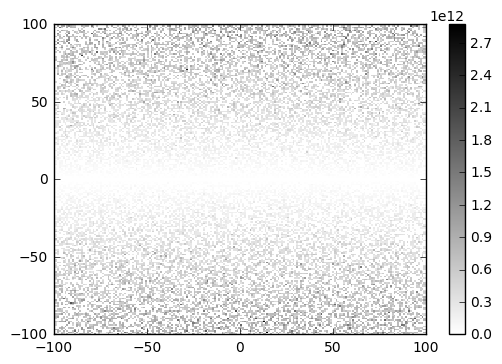

In [150]:
def eigen_condition_plot(axes, res):
    x_vals = np.linspace(axes[0],axes[1],res)
    y_vals = np.linspace(axes[2],axes[3],res)
    z = np.zeros((len(x_vals),len(y_vals)))
    for i in range(len(x_vals)):
        for j in range(len(y_vals)):
            A = np.array([[1,x_vals[i]],[y_vals[i],1]])
            z[i,j] = (eigen_condition(A))[1]
    plt.pcolormesh(x_vals, y_vals, z, cmap='gray_r')
    plt.colorbar() 
    plt.show()

eigen_condition_plot([-100,100,-100,100],200)

## Problem 5

Forward Error of Normal with n = 3 : 5.14221901575
Forward Error of QR with n = 3 : 5.14221901575


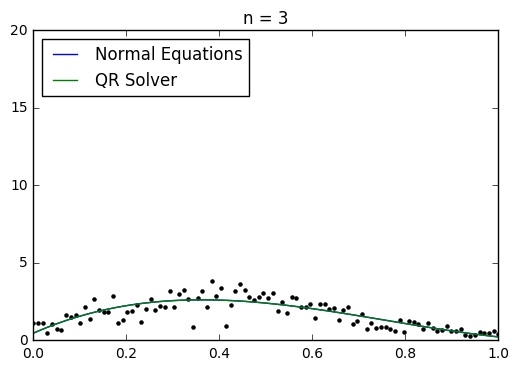

Forward Error of Normal with n = 10 : 4.64431175027
Forward Error of QR with n = 10 : 4.64430958754


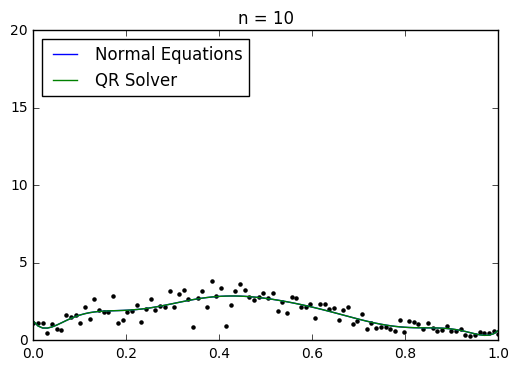

Forward Error of Normal with n = 14 : 46.1124174011
Forward Error of QR with n = 14 : 4.56837094233


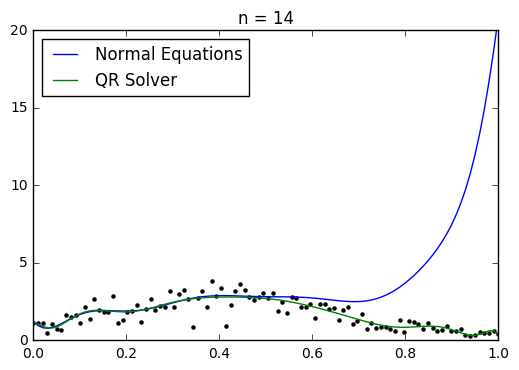

Forward Error of Normal with n = 18 : 4.83528876772
Forward Error of QR with n = 18 : 4.47547243962


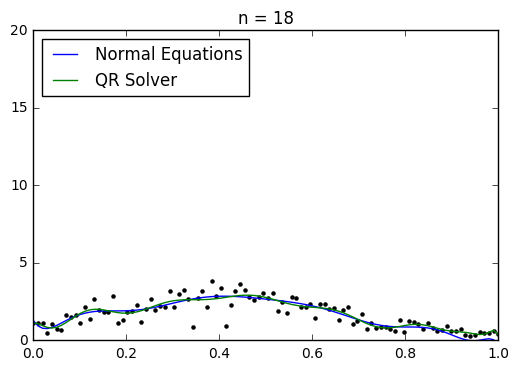

In [151]:
def polyfit(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    
    #Plot the scatterplot of points
    plt.scatter(xk,yk,c='k',marker='.')
    
    x = np.linspace(0,1,100)
    
    # Normal Equations
    AT = A.T
    product = np.dot(AT, A)
    coeff = np.dot(np.linalg.inv(product),np.dot(AT,yk))
    y = np.polyval(coeff, x)
    plt.plot(x,y, label="Normal Equations")
    print("Forward Error of Normal with n = " + str(n) + " : " + str(np.linalg.norm(np.dot(A,coeff)-yk)))

    # QR Solver
    Q, R = np.linalg.qr(A)
    coeff = np.dot(np.dot(np.linalg.inv(R),Q.T),yk)
    y = np.polyval(coeff, x)
    plt.plot(x,y,label="QR Solver")
    print("Forward Error of QR with n = " + str(n) + " : " + str(np.linalg.norm(np.dot(A,coeff)-yk)))
    plt.axis([0,1.0,0,20])
    plt.title("n = "+str(n))
    plt.legend(loc='upper left')
    plt.show()
    

polyfit(3)
polyfit(10)
polyfit(14)
polyfit(18)


## Problem 6

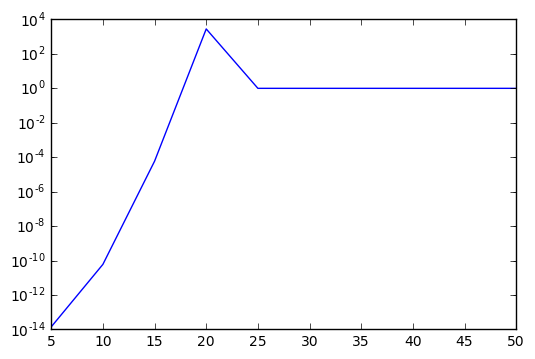

In [152]:
from sympy import *
import math


#Integral Form
n = 5
a = 0
b = 1
error = []
x = Symbol('x')
while n <= 50:
    f = (x**n)*(exp((x-1)))
    exact = float(integrate(f, (x, a, b)))
    I = ((-1)**n)*subfactorial(n)+((-1)**(n+1))*factorial(n)/math.e
    estimate = float(I)
    error.append(abs((exact-estimate)/exact))
    n+=5

N = np.linspace(5,50,10)
plt.plot(N,error)
plt.yscale('log')
plt.show()

The solution is not stable because the relative error increases and then levels off greater than 0.